In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-load the datasets
historical_data = pd.read_csv("C:/Users/bhave/Downloads/historical_data.csv")
fear_greed_index = pd.read_csv("C:/Users/bhave/Downloads/fear_greed_index.csv")

In [9]:
# Step 1: Preprocess and align dates
historical_data['date'] = pd.to_datetime(historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date']).dt.date 

In [11]:
#Aggregate trader performance per day
performance_daily = historical_data.groupby('date')[['Size USD', 'Closed PnL']].sum().reset_index()

In [17]:
# Step 3: Merge with market sentiment data
merged = pd.merge(performance_daily, fear_greed_index[['date', 'value', 'classification']], on='date',how='inner')

In [19]:
# Step 4: Analyze correlation
correlation = merged['value'].corr(merged['Closed PnL'])
classification_pnl = merged.groupby('classification')['Closed PnL'].mean()
print("Average PnL by Sentiment Classification:\n")
print(classification_pnl)

Average PnL by Sentiment Classification:

classification
Extreme Fear     52793.589178
Extreme Greed    23817.292199
Fear             36891.818040
Greed            11140.566181
Neutral          19297.323516
Name: Closed PnL, dtype: float64


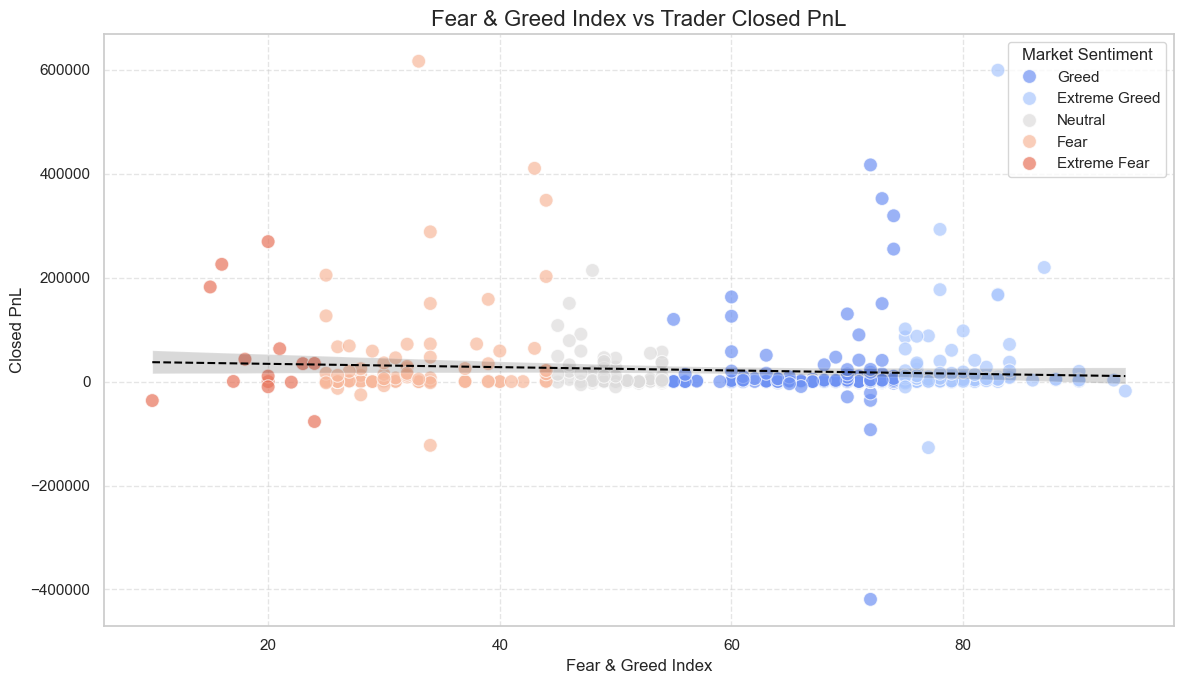

In [35]:
#Step 5
plt.figure(figsize=(12, 7))

# Scatter plot with enhanced markers and transparency
sns.scatterplot(
    data=merged,
    x='value',
    y='Closed PnL',
    hue='classification',
    palette='coolwarm',
    alpha=0.7,
    edgecolor='w',
    s=100
)

# Added a regression line to visualize trend
sns.regplot(
    data=merged,
    x='value',
    y='Closed PnL',
    scatter=False,
    color='black',
    line_kws={'linewidth': 1.5, 'linestyle': '--'}
)

plt.title('Fear & Greed Index vs Trader Closed PnL', fontsize=16)
plt.xlabel('Fear & Greed Index', fontsize=12)
plt.ylabel('Closed PnL', fontsize=12)
plt.legend(title='Market Sentiment')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\bhave\AppData\Local\Temp\ipykernel_7320\1768793159.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette="coolwarm")


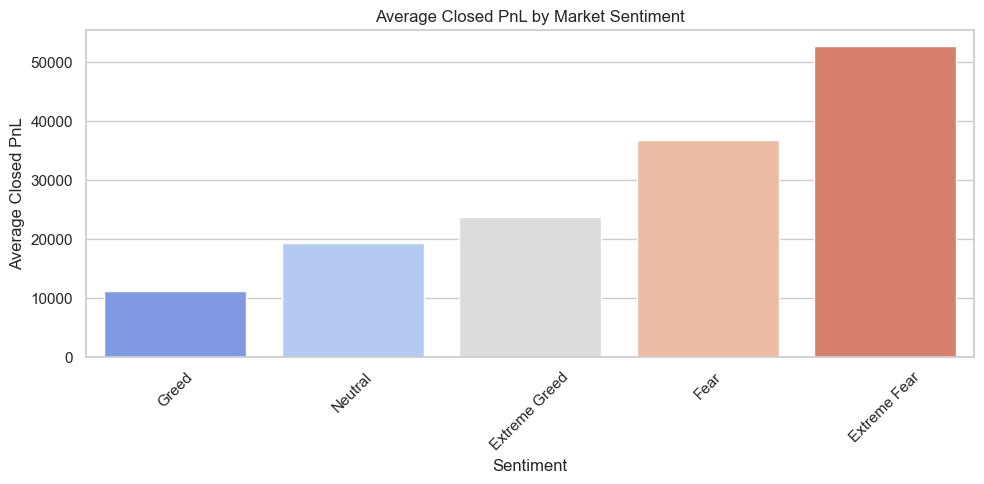

In [25]:
#average closed PnL by sentiment 
sns.set(style="whitegrid")
avg_pnl = merged.groupby('classification')['Closed PnL'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette="coolwarm")
plt.title("Average Closed PnL by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\bhave\AppData\Local\Temp\ipykernel_7320\3718817303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trade_counts.index, y=trade_counts.values, palette="viridis")


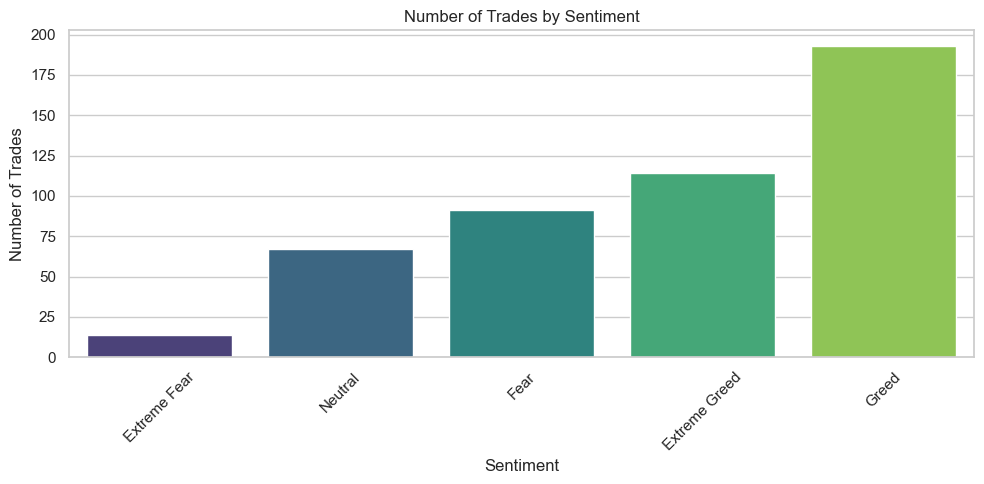

In [27]:
#trade by sentiment
trade_counts = merged['classification'].value_counts().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=trade_counts.index, y=trade_counts.values, palette="viridis")
plt.title("Number of Trades by Sentiment")
plt.ylabel("Number of Trades")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\bhave\AppData\Local\Temp\ipykernel_7320\1530467230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_rate.index, y=win_rate.values, palette="magma")


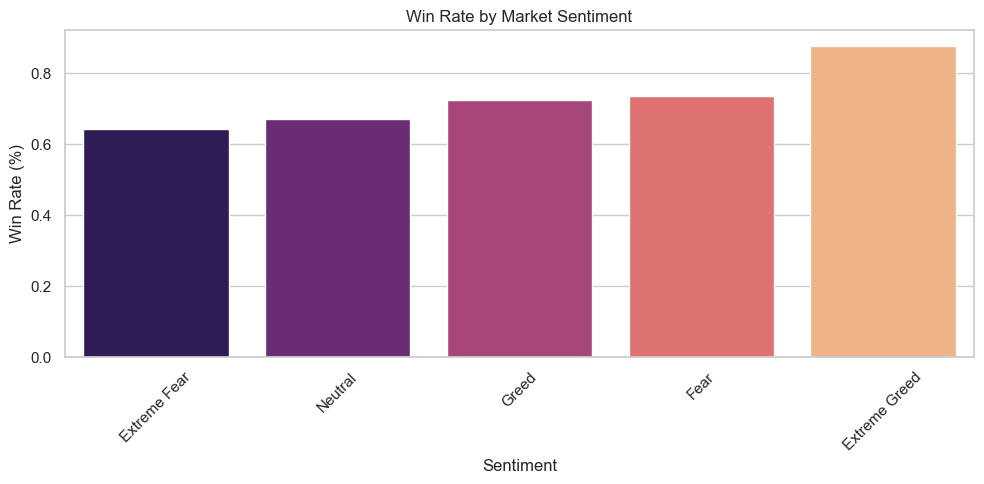

In [29]:
#win rate by market sentiment
merged['Is_Profitable'] = merged['Closed PnL'] > 0
win_rate = merged.groupby('classification')['Is_Profitable'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=win_rate.index, y=win_rate.values, palette="magma")
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

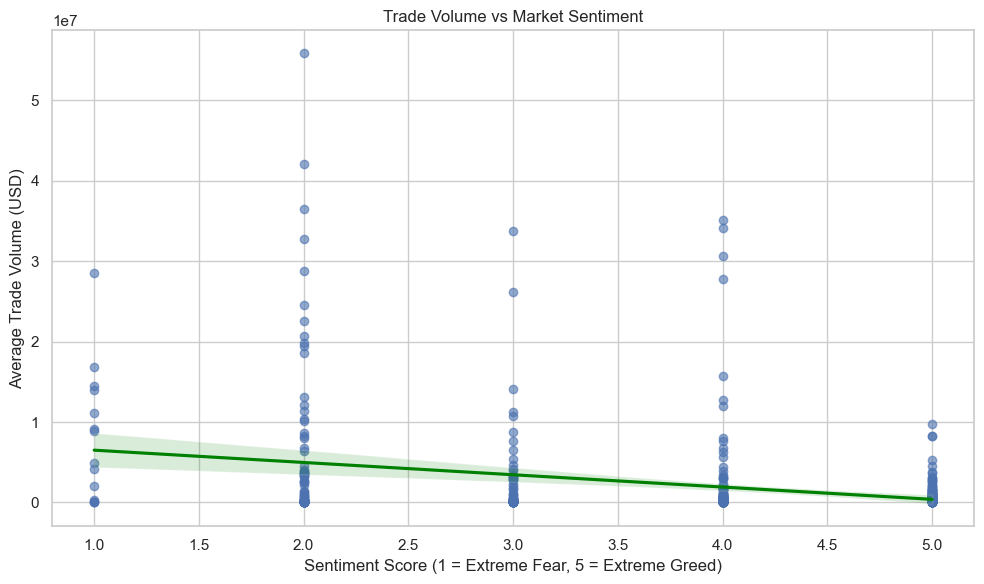

classification
Extreme Fear     8177447.25
Extreme Greed    1091799.69
Fear             5311261.43
Greed            1495246.09
Neutral          2690180.05
Name: Size USD, dtype: float64

In [33]:
# Step 6: Explore additional hidden patterns

# Add new features: sentiment category ranks
sentiment_order = {
    'Extreme Fear': 1,
    'Fear': 2,
    'Neutral': 3,
    'Greed': 4,
    'Extreme Greed': 5
}
merged['sentiment_score'] = merged['classification'].map(sentiment_order)

# Explore how trade volume changes across sentiment
volume_by_sentiment = merged.groupby('classification')['Size USD'].mean().round(2)

# Scatter plot to see volume vs sentiment score
plt.figure(figsize=(10, 6))
sns.regplot(data=merged, x='sentiment_score', y='Size USD', scatter_kws={'alpha': 0.6}, line_kws={'color': 'green'})
plt.title('Trade Volume vs Market Sentiment')
plt.xlabel('Sentiment Score (1 = Extreme Fear, 5 = Extreme Greed)')
plt.ylabel('Average Trade Volume (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Insights:

1. Traders tend to achieve higher profits (PnL) during periods of Fear and Extreme Fear, likely due to increased market inefficiencies or more disciplined trading approaches.

2. The "Fear & Greed Index vs Trader PnL chart" illustrates the fluctuations in trader PnL relative to sentiment values, with each sentiment category visually distinguished by color.

3. Trading activity spikes noticeably during Fear and Extreme Fear phases. This trend may be driven by:

   * Panic-induced, high-volume trading
   * Increased volatility creating more opportunities
   * Institutional investors taking advantage of discounted market conditions

4. Strategic Trading Implications:

   * Elevated trading volume and improved PnL during fearful sentiment periods indicate that contrarian strategies —such as buying when others are fearful—can be more effective.
   * Traders may benefit from increasing their participation during fear phases, while still adhering to sound risk management practices.
